<a href="https://colab.research.google.com/github/saadan1234/Optical-Network-and-Technologies/blob/main/NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DataSet_EU_3k_5k.xlsx'
data = pd.read_excel(file_path)
data.head()

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_9,Power_10,...,GSNR_69,GSNR_70,GSNR_71,GSNR_72,GSNR_73,GSNR_74,GSNR_75,GSNR_76,No. Spans,Total Distance(m)
0,0.000000,0.000000,0.000007,0.000007,0.000007,0.000000,0.000007,0.0,0.000007,0.0,...,90.061284,0.000000,0.000000,0.000000,0.000000,95.045789,0.000000,0.000000,8,690608.0
1,0.000000,0.000007,0.000000,0.000007,0.000000,0.000007,0.000000,0.0,0.000000,0.0,...,0.000000,92.560867,0.000000,0.000000,89.544975,0.000000,0.000000,0.000000,8,690608.0
2,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.0,0.000007,0.0,...,0.000000,0.000000,90.991977,0.000000,0.000000,0.000000,85.512399,83.114113,8,690608.0
3,0.000007,0.000007,0.000007,0.000007,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,76.409583,73.664915,74.651700,79.071217,0.000000,0.000000,0.000000,0.000000,8,690608.0
4,0.000000,0.000000,0.000007,0.000000,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,0.000000,0.000000,78.299438,74.910765,72.030907,73.790264,81.190439,0.000000,8,690608.0


# Individual Visualizations

Correlation Matrix:
                    Power_1     ASE_1     NLI_1  No. Spans  Total Distance(m)  \
Power_1            1.000000 -0.422761  0.981919   0.463124           0.464046   
ASE_1             -0.422761  1.000000 -0.379882   0.562459           0.563680   
NLI_1              0.981919 -0.379882  1.000000   0.491886           0.493352   
No. Spans          0.463124  0.562459  0.491886   1.000000           0.999607   
Total Distance(m)  0.464046  0.563680  0.493352   0.999607           1.000000   
frequency_1             NaN       NaN       NaN        NaN                NaN   
GSNR_1             0.079878 -0.476160  0.011496  -0.435421          -0.434674   

                   frequency_1    GSNR_1  
Power_1                    NaN  0.079878  
ASE_1                      NaN -0.476160  
NLI_1                      NaN  0.011496  
No. Spans                  NaN -0.435421  
Total Distance(m)          NaN -0.434674  
frequency_1                NaN       NaN  
GSNR_1                     NaN

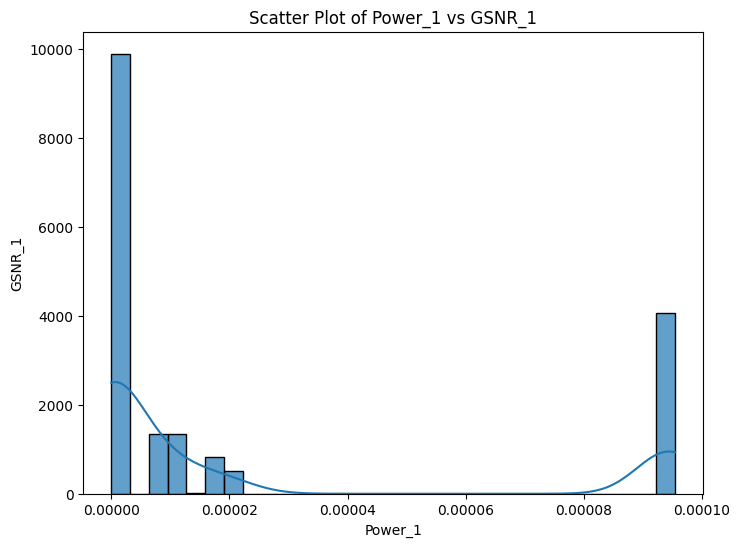

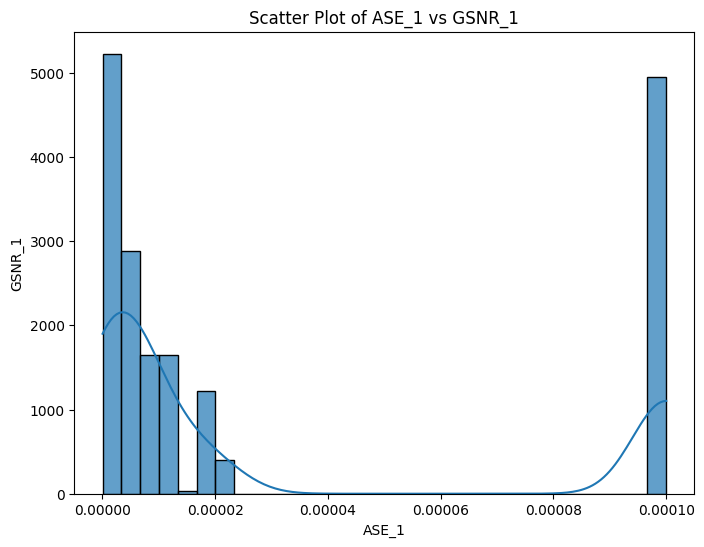

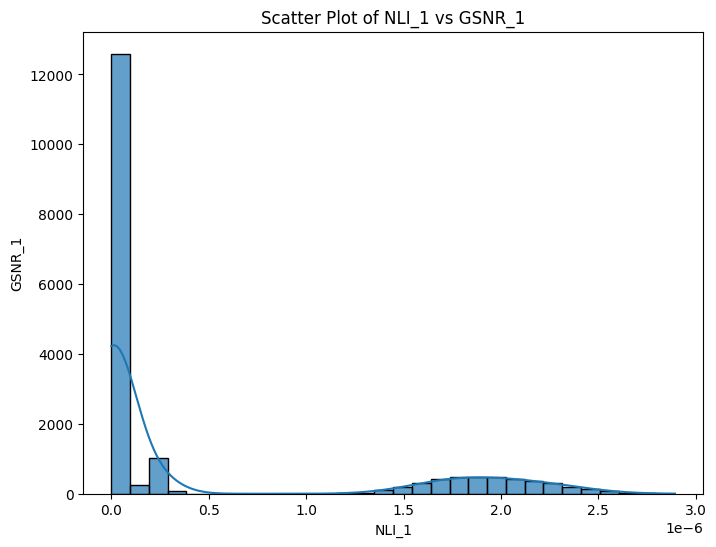

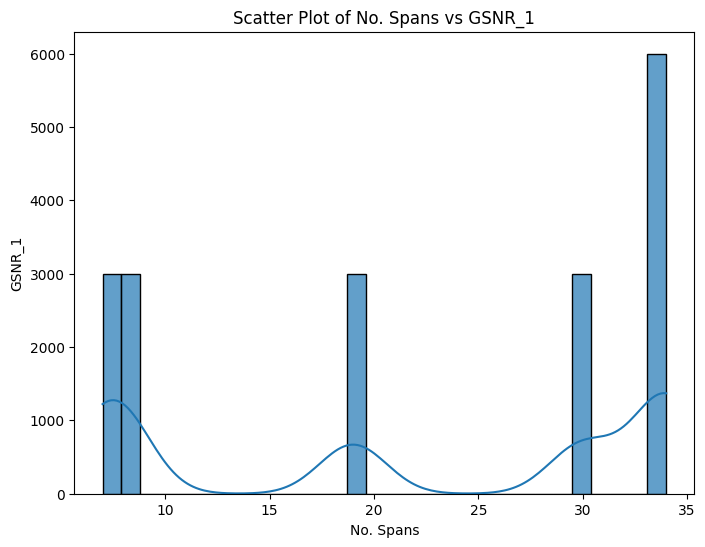

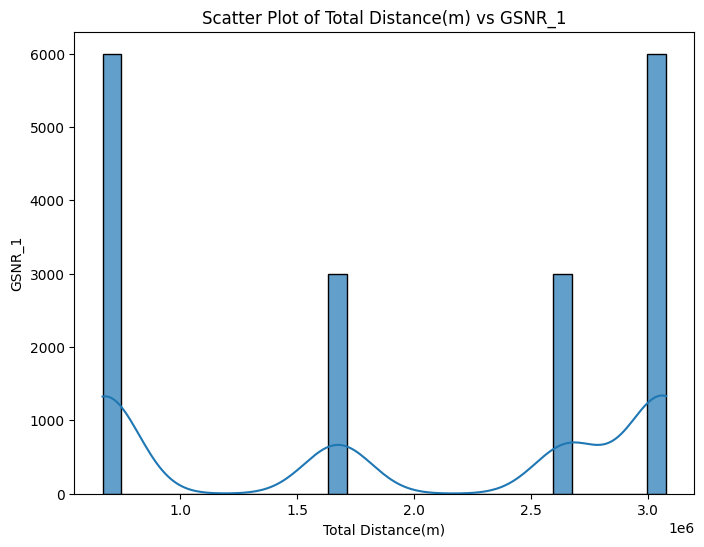

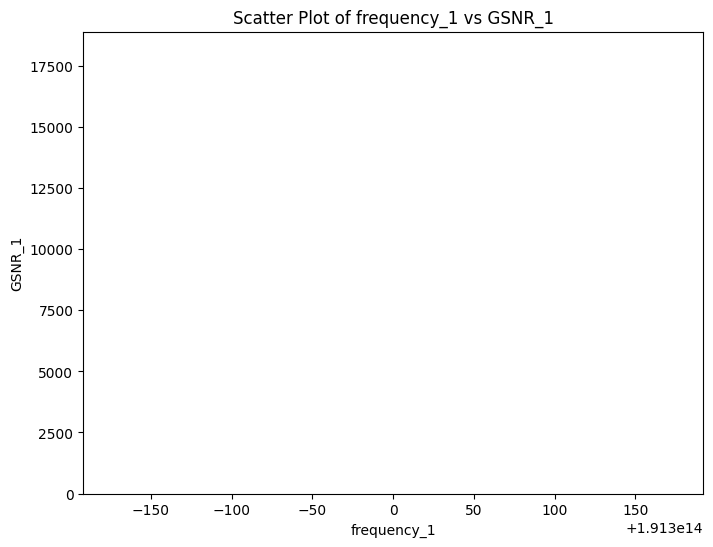

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features for visualization assuming all columns from 1-76 of particular feature are similar
attribute_columns = [f'Power_{i}' for i in range(1, 2)] + [f'ASE_{i}' for i in range(1, 2)] + [f'NLI_{i}' for i in range(1, 2)]+ ['No. Spans'] + ['Total Distance(m)'] + [f'frequency_{i}' for i in range(1, 2)]
target_column = 'GSNR_1'

#Correlation matrix to help with feature selection
correlation_matrix = data[attribute_columns + [target_column]].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Histogram plots for each attribute column against the target variable
for column in attribute_columns:
    plt.figure(figsize=(8, 6))
    # sns.scatterplot(data=data, x=column, y=target_column, alpha=0.7)
    sns.histplot(data=data, x=column, kde=True, bins=30, alpha=0.7)
    plt.title(f'Scatter Plot of {column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()


Empty feature plot tells that all the values of feature column are constant. Thus the feature is redundant and has no use is model training.

# Normalization

In [ ]:
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# All features for normalization and data training
attribute_columns = [f'Power_{i}' for i in range(1, 77)] + [f'ASE_{i}' for i in range(1, 77)] + [f'NLI_{i}' for i in range(1, 77)]+ ['No. Spans'] + ['Total Distance(m)'] + [f'frequency_{i}' for i in range(1, 77)]
print(len(attribute_columns))

# MinMax Normalization
scaler = MinMaxScaler()
mxdata = scaler.fit_transform(data[attribute_columns])
mxdata = pd.DataFrame(mxdata, columns=attribute_columns)

label = data[target_column].values.reshape(-1, 1)
mydata = scaler.fit_transform(label)
mydata = pd.DataFrame(mydata, columns=[target_column])

# Z-Score Normalization
scaler = StandardScaler()
zxdata = scaler.fit_transform(data[attribute_columns])
zxdata = pd.DataFrame(zxdata, columns=attribute_columns)

zydata = scaler.fit_transform(label)
zydata = pd.DataFrame(zydata, columns=[target_column])

# Display the first few rows of the normalized data
print("MinMax Normalized Data:")
print(mxdata['Power_1'].head(),mxdata['ASE_1'].head(),mxdata['NLI_1'].head(),mxdata['frequency_1'].head(),mxdata['No. Spans'].head(),mxdata['Total Distance(m)'].head())
print(mydata.head())

print("Z-Score Normalized Data:")
print(zxdata['Power_1'].head(),mxdata['ASE_1'].head(),mxdata['NLI_1'].head(),mxdata['frequency_1'].head(),mxdata['No. Spans'].head(),mxdata['Total Distance(m)'].head())
print(zydata.head())

306
MinMax Normalized Data:
0    0.000000
1    0.000000
2    0.000000
3    0.076798
4    0.000000
Name: Power_1, dtype: float64 0    0.075117
1    0.073203
2    0.073788
3    0.000062
4    0.071547
Name: ASE_1, dtype: float64 0    0.000000
1    0.000000
2    0.000000
3    0.017928
4    0.000000
Name: NLI_1, dtype: float64 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: frequency_1, dtype: float64 0    0.037037
1    0.037037
2    0.037037
3    0.037037
4    0.037037
Name: No. Spans, dtype: float64 0    0.008849
1    0.008849
2    0.008849
3    0.008849
4    0.008849
Name: Total Distance(m), dtype: float64
    GSNR_1
0  0.00000
1  0.00000
2  0.00000
3  0.79791
4  0.00000
Z-Score Normalized Data:
0   -0.627072
1   -0.627072
2   -0.627072
3   -0.435928
4   -0.627072
Name: Power_1, dtype: float64 0    0.075117
1    0.073203
2    0.073788
3    0.000062
4    0.071547
Name: ASE_1, dtype: float64 0    0.000000
1    0.000000
2    0.000000
3    0.017928
4    0.000000
Name: NLI_1, dtype: float6

# Correlations

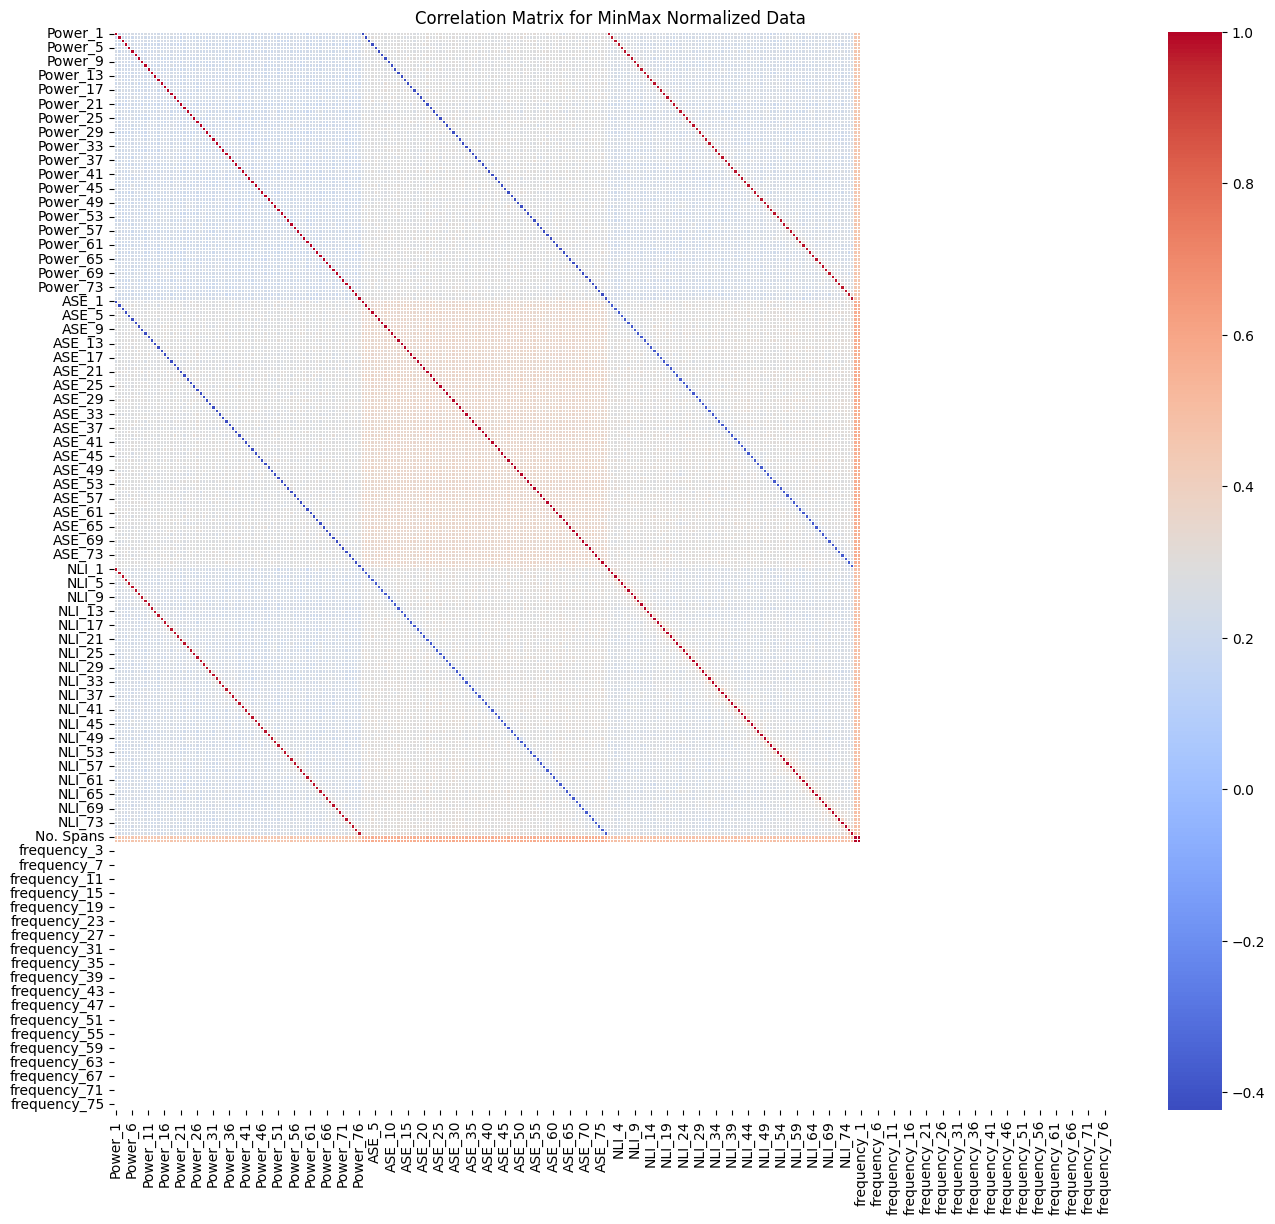

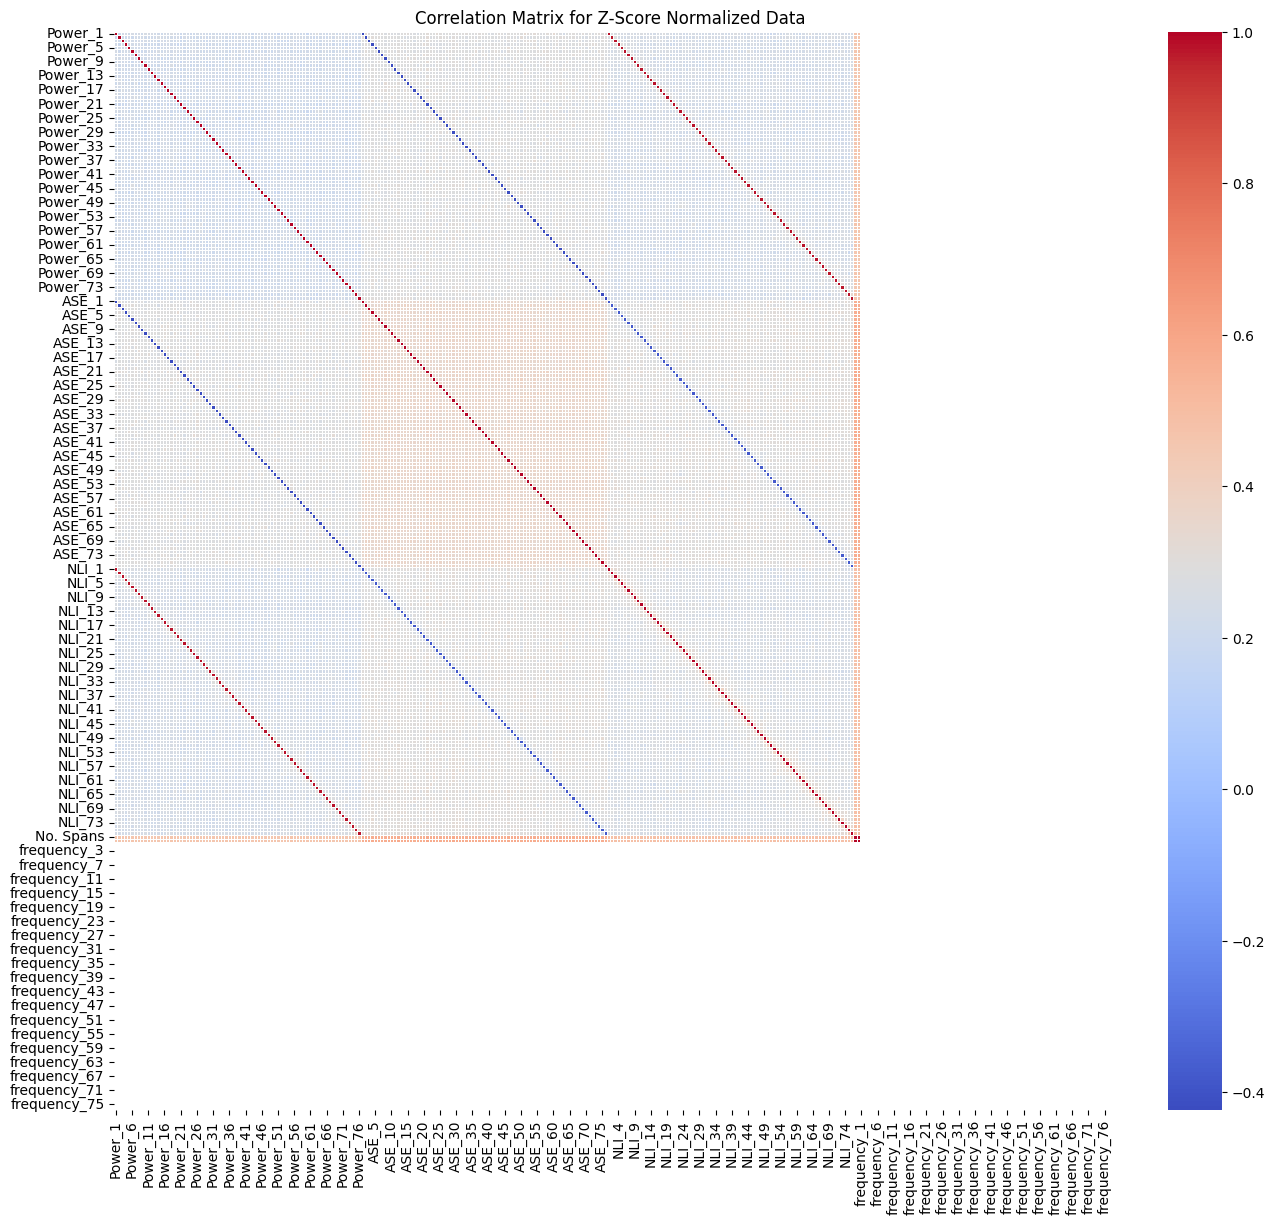

In [ ]:
# Compute correlation matrices
# MinMax Normalized Data
minmax_corr_matrix = mxdata.corr()

# Z-Score Normalized Data
zscore_corr_matrix = zxdata.corr()

# Visualize correlation matrices using heatmaps
plt.figure(figsize=(16, 14))
sns.heatmap(minmax_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for MinMax Normalized Data')
plt.show()

plt.figure(figsize=(16, 14))
sns.heatmap(zscore_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Z-Score Normalized Data')
plt.show()

# The empty space at frequency column and row show that there is not any correlation due to constant values of freqency

Empty correlation matrix shows their is no relation between target variable and frequency due to constant values of frequency.

# Train Test Split

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# For each 3000 sample block of same path add first 2500 samples in train data and the rest 500 in test data
def custom_train_test_split(data, labels, samples_per_block=3000, train_samples_per_block=2500, test_samples_per_block=500):
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []

    total_samples = len(data)

    for start in range(0, total_samples, samples_per_block):
        end = start + samples_per_block
        train_end = start + train_samples_per_block

        if train_end > total_samples:
            train_end = total_samples
        if end > total_samples:
            end = total_samples

        train_data.append(data[start:train_end])
        test_data.append(data[train_end:end])
        train_labels.append(labels[start:train_end])
        test_labels.append(labels[train_end:end])

    train_data = pd.concat(train_data).reset_index(drop=True)
    test_data = pd.concat(test_data).reset_index(drop=True)
    train_labels = pd.concat(train_labels).reset_index(drop=True)
    test_labels = pd.concat(test_labels).reset_index(drop=True)

    return train_data, test_data, train_labels, test_labels

# Assuming 'zxdata' and 'zydata' are your DataFrames for Z-score normalized data
attribute_columns_without_frequency = [col for col in attribute_columns if not col.startswith('frequency')]
zxdata_train, zxdata_test, zydata_train, zydata_test = custom_train_test_split(zxdata[attribute_columns_without_frequency], zydata[target_column])

# Assuming 'mxdata' and 'mydata' are your DataFrames for MinMax normalized data
mxdata_train, mxdata_test, mydata_train, mydata_test = custom_train_test_split(mxdata[attribute_columns_without_frequency], mydata[target_column])

# Display shapes to verify the split
print("Z-score normalized data:")
print("Train data shape:", zxdata_train.shape)
print("Test data shape:", zxdata_test.shape)
print("Train labels shape:", zydata_train.shape)
print("Test labels shape:", zydata_test.shape)

print("\nMinMax normalized data:")
print("Train data shape:", mxdata_train.shape)
print("Test data shape:", mxdata_test.shape)
print("Train labels shape:", mydata_train.shape)
print("Test labels shape:", mydata_test.shape)


Z-score normalized data:
Train data shape: (15000, 230)
Test data shape: (3000, 230)
Train labels shape: (15000,)
Test labels shape: (3000,)

MinMax normalized data:
Train data shape: (15000, 230)
Test data shape: (3000, 230)
Train labels shape: (15000,)
Test labels shape: (3000,)


# Models

In [ ]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.metrics import mean_squared_error

# # Initialize regression models
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Random Forest Regression': RandomForestRegressor(),
#     'Gradient Boosting Regression': GradientBoostingRegressor(),
#     'Decision Tree Regression': DecisionTreeRegressor(),
#     'KNN Model': KNeighborsRegressor(),
#     'Support Vector Machines (SVM)': SVR(),
#     'Gaussian Regression': GaussianProcessRegressor()
# }

# # Train and evaluate each model on Z-score normalized data
# print("Z-Score Normalized Data:")
# for model_name, model in models.items():
#     model.fit(zxdata_train, zydata_train)
#     zydata_pred = model.predict(zxdata_test)
#     mse = mean_squared_error(zydata_test, zydata_pred)
#     print(f"{model_name}: Mean Squared Error = {mse:.6f}")

# # Train and evaluate each model on MinMax normalized data
# print("\nMinMax Normalized Data:")
# for model_name, model in models.items():
#     model.fit(mxdata_train, mydata_train)
#     mydata_pred = model.predict(mxdata_test)
#     mse = mean_squared_error(mydata_test, mydata_pred)
#     print(f"{model_name}: Mean Squared Error = {mse:.6f}")


In [ ]:
#  import warnings
# # Suppress specific warnings
# warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")


# # Function to predict using a single input and a trained model
# def predict_single(model, input_data):
#     prediction = model.predict([input_data])  # Input data should be a list or array-like
#     return prediction[0]

# print("\nSingle input predictions (MinMax Normalized Data):")

# #MinMax Normalized Data
# # Example usage of the predict_single function
# single_input = mxdata_test.iloc[2512]  # Using .iloc to get the first row
# print(mydata_test.iloc[2512] )

# #Visualization of comparison between actual values with the predicted ones.

# for model_name, model in models.items():
#     prediction = predict_single(model, single_input)
#     print(f"{model_name}: Prediction = {prediction:.6f}")

# print("\nSingle input predictions (Z-Score Normalized Data):")
# #Z-Score Normalized Data
# # Example usage of the predict_single function
# single_input = zxdata_test.iloc[2512]  # Using .iloc to get the first row
# print(zydata_test.iloc[2512] )

# #Visualization of comparison between actual values with the predicted ones.

# for model_name, model in models.items():
#     prediction = predict_single(model, single_input)
#     print(f"{model_name}: Prediction = {prediction:.6f}")

# HyperParameter Tuning

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

input_shape = mxdata_train.shape[1]

def build_model(hp):
    model = Sequential()

    # First layer with input shape specified
    model.add(Dense(64, activation='relu', input_shape=(input_shape,), name="Layer1"))  # Input layer with ReLU activation
    model.add(Dense(units=hp.Choice('units', [8, 16, 32]),
                    activation=hp.Choice('activation1', ['relu', 'tanh'])))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))

    # Additional layers
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Choice('units', [8, 16, 32]),
                        activation=hp.Choice('activation1', ['relu', 'tanh'])))
        model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Compile model
    model.compile(optimizer='adam', loss='mse')

    return model

In [ ]:
tuner = keras_tuner.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='ONTTask2')

# Search for the best hyperparameters
tuner.search(mxdata_train, mydata_train, epochs=5, validation_data=(mxdata_test, mydata_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best hyperparameters:")
for key, value in best_hps.values.items():
    print(f"{key}: {value}")


Trial 30 Complete [00h 00m 23s]
val_loss: 0.002419157652184367

Best val_loss So Far: 0.00015420095587614924
Total elapsed time: 00h 05m 02s
Best hyperparameters:
units: 32
activation1: relu
dropout1: 0.0
num_layers: 5
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012


# Choices

The above hyperparameter tuning is done using keras and grid search approach with following parameter options:

1) Number of Units: 8,16,32

2) Activation Function: tanh, relu

3) Dropout Layer values: 0.1, 0.2, 0.3, 0.4, 0.5

4) Layers: 1,2,3,4,5

5) Optimization algorithm is not included in grid search but the running the above code with rmsprop, ada, adam and sgd; adam optimization gave better results.

In [ ]:
best_model.summary()

# Hypertuned parameter models
best_modelm = best_model
best_modelz = best_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 64)                14784     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [ ]:
# Function to define and compile the model
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),  # Input layer with ReLU activation
        Dense(32, activation='relu'),  # Hidden layer with ReLU activation
        Dense(32, activation='relu'),  # Hidden layer with ReLU activation
        Dense(32, activation='relu'),  # Hidden layer with ReLU activation
        Dense(1)  # Output layer (assuming regression task, no activation)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model

# Create custom models
modelm = create_model(input_shape)
modelz = create_model(input_shape)


# Print model summary
modelm.summary()
modelz.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                14784     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential

## Training

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 7.9730e-05 - val_loss: 1.1651e-04
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 7.8457e-05 - val_loss: 1.0321e-04
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 8.5081e-05 - val_loss: 1.0010e-04
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 8.3887e-05 - val_loss: 1.0364e-04
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 7.4819e-05 - val_loss: 9.3464e-05
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 7.9920e-05 - val_loss: 1.6149e-04
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 7.4640e-05 - val_loss: 9.8186e-05
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 8.0548e-05 - val_loss: 8.7425e-05
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 7.5346e-05 - val_loss: 9.3486e-05
Epoch 10/100
235/23

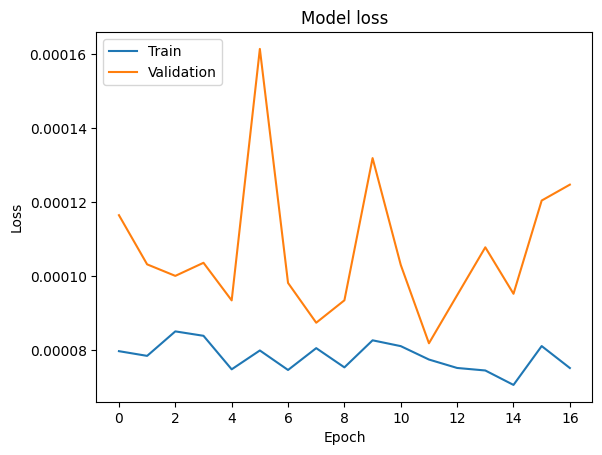

Epoch 1/100
235/235 [==============================] - 2s 4ms/step - loss: 0.0393 - mae: 0.1276 - val_loss: 0.0020 - val_mae: 0.0331
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0010 - mae: 0.0236 - val_loss: 7.7159e-04 - val_mae: 0.0203
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 6.1170e-04 - mae: 0.0176 - val_loss: 4.8373e-04 - val_mae: 0.0157
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 4.3260e-04 - mae: 0.0143 - val_loss: 4.8716e-04 - val_mae: 0.0154
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 3.7500e-04 - mae: 0.0134 - val_loss: 4.4145e-04 - val_mae: 0.0135
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 3.2961e-04 - mae: 0.0121 - val_loss: 4.2489e-04 - val_mae: 0.0136
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 2.7441e-04 - mae: 0.0111 - val_loss: 2.6743e-04 - val_mae: 0.0110
Epoch 8/100
235/235 [====

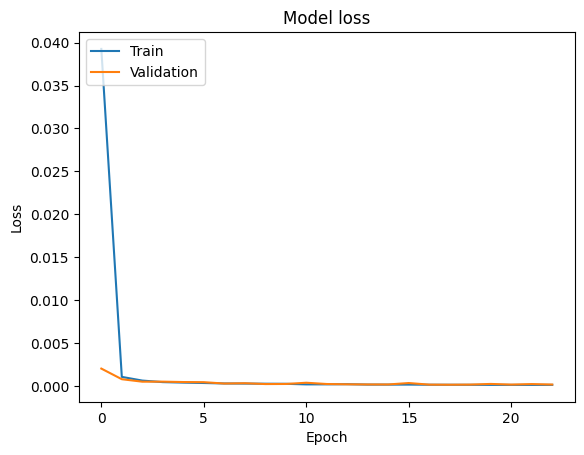

In [ ]:
# Fit the best model
history = best_modelm.fit(mxdata_train, mydata_train, epochs=100, batch_size=64, validation_data=(mxdata_test, mydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

# Evaluate the model
results = best_modelm.evaluate(mxdata_test, mydata_test)
print("Loss: ",results)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Fit the best model
history = modelm.fit(mxdata_train, mydata_train, epochs=100, batch_size=64, validation_data=(mxdata_test, mydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

# Evaluate the model
results = modelm.evaluate(mxdata_test, mydata_test)
print("Loss: ",results)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3644 - val_loss: 0.1893
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1785 - val_loss: 0.1919
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1785 - val_loss: 0.1896
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1781 - val_loss: 0.1909
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1782 - val_loss: 0.1919
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1896
Loss:  0.1895928531885147


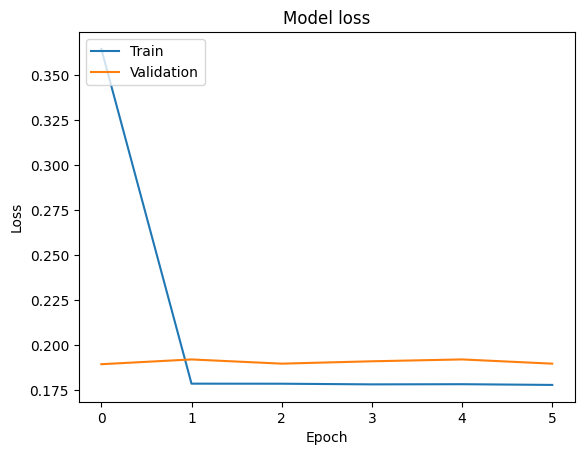

Epoch 1/100
235/235 [==============================] - 2s 4ms/step - loss: 0.7147 - mae: 0.5871 - val_loss: 0.4072 - val_mae: 0.4194
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.2411 - mae: 0.2878 - val_loss: 0.0550 - val_mae: 0.1464
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0377 - mae: 0.1156 - val_loss: 0.0281 - val_mae: 0.1044
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0211 - mae: 0.0882 - val_loss: 0.0368 - val_mae: 0.1163
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0131 - mae: 0.0685 - val_loss: 0.0119 - val_mae: 0.0717
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0092 - mae: 0.0588 - val_loss: 0.0095 - val_mae: 0.0633
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0080 - mae: 0.0542 - val_loss: 0.0186 - val_mae: 0.0825
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - 

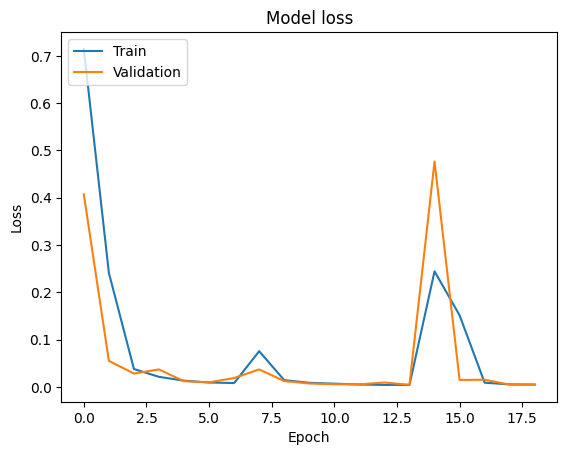

In [ ]:
#Z-Score Normalized Data
history = best_modelz.fit(zxdata_train, zydata_train, epochs=100, batch_size=64, validation_data=(zxdata_test, zydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

# Evaluate the model
results = best_modelz.evaluate(zxdata_test, zydata_test)
print("Loss: ",results)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Z-Score Normalized Data
history = modelz.fit(zxdata_train, zydata_train, epochs=100, batch_size=64, validation_data=(zxdata_test, zydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

# Evaluate the model
results = modelz.evaluate(zxdata_test, zydata_test)
print("Loss: ",results)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Evaluation

In [ ]:
import warnings
import numpy as np

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")

print("\nSingle input predictions hypertuned (MinMax Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = mxdata_test.iloc[2212]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", mydata_test.iloc[2212])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = best_modelm.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions hypertuned (Z-Score Normalized Data):")

# Z-Score Normalized Data
single_input_zscore = zxdata_test.iloc[2212]  # Using .iloc to get the first row
single_input_zscore = np.array(single_input_zscore).reshape(1, 230)
print("Actual Value:", zydata_test.iloc[2212])  # Assuming zydata_test contains actual values

# Making prediction
prediction_zscore = best_modelz.predict(single_input_zscore)
predicted_value_zscore = prediction_zscore[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_zscore:.6f}")

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")

print("\nSingle input predictions custom (MinMax Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = mxdata_test.iloc[2212]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", mydata_test.iloc[2212])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = modelm.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions custom (Z-Score Normalized Data):")

# Z-Score Normalized Data
single_input_zscore = zxdata_test.iloc[2212]  # Using .iloc to get the first row
single_input_zscore = np.array(single_input_zscore).reshape(1, 230)
print("Actual Value:", zydata_test.iloc[2212])  # Assuming zydata_test contains actual values

# Making prediction
prediction_zscore = modelz.predict(single_input_zscore)
predicted_value_zscore = prediction_zscore[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_zscore:.6f}")




Single input predictions hypertuned (MinMax Normalized Data):
Actual Value: 0.16041548580088213
1/1 [==============================] - 0s 23ms/step
Neural Network Output: Prediction = -0.166139

Single input predictions hypertuned (Z-Score Normalized Data):
Actual Value: -0.07283697150547955
1/1 [==============================] - 0s 25ms/step
Neural Network Output: Prediction = -0.054181

Single input predictions custom (MinMax Normalized Data):
Actual Value: 0.16041548580088213
1/1 [==============================] - 0s 87ms/step
Neural Network Output: Prediction = 0.172926

Single input predictions custom (Z-Score Normalized Data):
Actual Value: -0.07283697150547955
1/1 [==============================] - 0s 75ms/step
Neural Network Output: Prediction = -0.052928


### Results

The above difference between the models and their predictions suggest the following:

Hypertuned models perform better then custom ones but their are many factors which influence these results as following:

1) A larger batch size gives more accurate results but takes more computational resources and time.

2) A smaller learning rate gives more accurate results but takes a larger amount of time to converge.

3) tanh activation function performs better for the above problem in hidden layers then the relu activation function.

4) Increasing the number of layers have more positive impact then increasing number of neurons per layer.

5) Adam optimizer performs better because of its momentum consideration capability then rmsprop or other optimization algorithms.

6) For small models like above dropout layer has no advantage as it does not learn any insignificant weights.


# Save Model

In [ ]:
# Define the path to save the model
model_save_path = '/content/drive/My Drive/models/bestmodel.h5'

In [ ]:
# Save the models
best_model.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The model is saved so it can then be used later on in different notebook for transfer learning.

# Conclusion

The above notebook has a deep learning model trained with help of hyperparameter tuning with best possible values and its comparison with custom built model and their results.